In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/goods_prices.csv", sep=';', encoding='windows-1250')

In [4]:
new_df = df[df['Sposób prezentacji'] == 'Poprzedni miesiąc = 100']

In [5]:
new_df = new_df[['Rok', 'Miesiąc', 'Wartość']]

In [6]:
new_df.dropna(inplace=True)

In [11]:
new_df = new_df.sort_values(['Rok', 'Miesiąc'], ascending=False)

In [8]:
new_df.reset_index(drop=True, inplace=True)

In [12]:
new_df

,Rok,Miesiąc,Wartość
0,2022,4,"102,0"
1,2022,3,"103,3"
2,2022,2,"99,7"
3,2022,1,"101,9"
4,2021,12,"100,9"
...,...,...,...
479,1982,5,"102,7"
480,1982,4,"103,1"
481,1982,3,"105,8"
482,1982,2,"136,3"


In [70]:
new_df['Wartość'] = new_df['Wartość'].str.replace(',', '.').astype(float)

In [71]:
new_df['Data'] = new_df['Rok'].astype(str) + '.' + new_df['Miesiąc'].astype(str)
new_df = new_df.set_index('Data')

In [72]:
new_df.index = pd.to_datetime(new_df.index, format="%Y.%m")

In [73]:
new_df

,Rok,Miesiąc,Wartość
Data,,,
2022-04-01,2022,4,102.0
2022-03-01,2022,3,103.3
2022-02-01,2022,2,99.7
2022-01-01,2022,1,101.9
2021-12-01,2021,12,100.9
...,...,...,...
1982-05-01,1982,5,102.7
1982-04-01,1982,4,103.1
1982-03-01,1982,3,105.8


In [74]:
import datetime
new_df = new_df[new_df.index > datetime.datetime(1998, 12, 1)]

Text(0, 0.5, 'Wskaźnik cen')

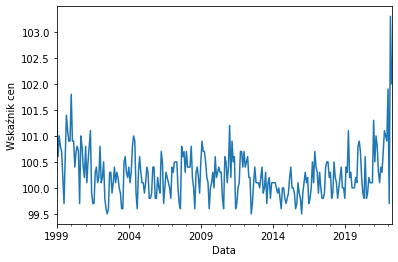

In [75]:
import matplotlib.pyplot as plt

new_df['Wartość'].plot.line()
plt.xlabel('Data')
plt.ylabel('Wskaźnik cen')

In [76]:
for i in range(1, 13):
    new_df[f'Month - {i}'] = new_df['Wartość'].shift(-i)

C:\Users\ktr\AppData\Local\Temp\ipykernel_13676\418511546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'Month - {i}'] = new_df['Wartość'].shift(-i)
C:\Users\ktr\AppData\Local\Temp\ipykernel_13676\418511546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'Month - {i}'] = new_df['Wartość'].shift(-i)
C:\Users\ktr\AppData\Local\Temp\ipykernel_13676\418511546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [77]:
new_df = new_df.dropna()

In [78]:
X = new_df.loc[:, new_df.columns.str.contains('Month')]

In [79]:
y = new_df['Wartość']

In [80]:
mask_train = X.index < datetime.datetime(2020, 1, 1)

In [81]:
X_train = X[mask_train]

In [82]:
X_test = X[~mask_train]

In [83]:
y_train = y[mask_train]

In [84]:
y_test = y[~mask_train]

In [85]:
import tensorflow as tf

def create_model():
    NN_model = tf.keras.Sequential()
    NN_model.add(tf.keras.layers.Dense(128, kernel_initializer='normal', activation='relu'))
    NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(tf.keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))
    return NN_model

In [86]:
model = create_model()
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 6338.9380 - mean_squared_error: 6338.9380
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 820.5080 - mean_squared_error: 820.5080
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 432.6668 - mean_squared_error: 432.6668
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 122.3335 - mean_squared_error: 122.3335
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 53.5577 - mean_squared_error: 53.5577
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 28.7302 - mean_squared_error: 28.7302
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 14.1763 - mean_squared_error: 14.1763
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 6.9965 - mean_squared_error: 6.9965
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 3.0879 - mean_squared_error: 3.0879
Epoch 10/50
8/8 [=====

In [87]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 53ms/step


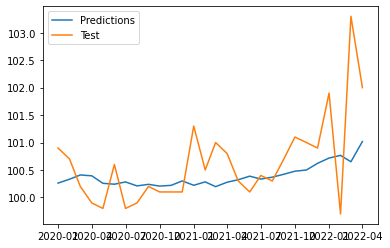

In [88]:
plt.plot(X_test.index, y_pred, label='Predictions')
plt.plot(X_test.index, y_test, label='Test')
plt.legend()
# plt.legend(['Predictions', 'Test'])

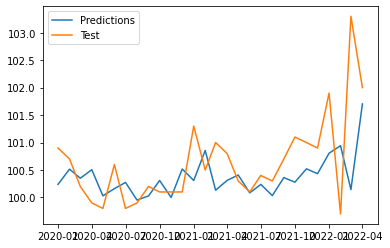

In [89]:
from sklearn.linear_model import LinearRegression
model_l = LinearRegression()
model_l.fit(X_train, y_train)
pred_l = model_l.predict(X_test)
plt.plot(X_test.index, pred_l, label='Predictions')
plt.plot(X_test.index, y_test, label='Test')
plt.legend()

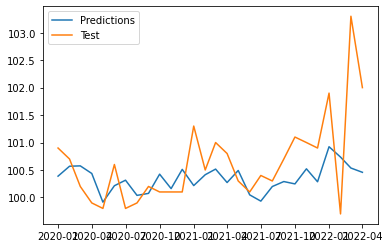

In [90]:
from sklearn.svm import SVR
model_s = SVR(C=1.0)
model_s.fit(X_train, y_train)
pred_s = model_s.predict(X_test)
plt.plot(X_test.index, pred_s, label='Predictions')
plt.plot(X_test.index, y_test, label='Test')
plt.legend()

In [91]:
import pickle
from keras.models import save_model

filename = 'linear_regression.sav'
pickle.dump(model_l, open(filename, 'wb'))

filename = 'support_vector.sav'
pickle.dump(model_s, open(filename, 'wb'))

model.save_weights('deep_learning.h5')